# Explore HMI dataset and extract blinks signal in EEG

## Dataset Structure

- Subject1
    - Sample1
        - EEG.edf: EEG signal in EDF format
        - eeg.json: General information about EEG signal
        - EEGTimeStamp.txt: Timestamp corresponding to EEG sample
        - ET.csv: ET samples
        - FaceGesture.avi: Face video
        - scenario.json: Information about experiment
    - Sample2
    - ...
    - Sample9
- Subject2
- ...

In [1]:
import mne
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
import sys
sys.path.append('..')
sys.path.append('hbd/')

from hbd.utils import dataloader as hmi_dataloader

In [3]:
sample_path = '../DataVIN/BV103_01/sample4/'

In [4]:
raw = mne.io.read_raw_edf(sample_path + 'EEG.edf')

Extracting EDF parameters from /Users/datnguyen/Documents/Git/NLM_EEG_ET/DataVIN/BV103_01/sample4/EEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [5]:
eegts = pd.read_csv(sample_path + 'EEGTimeStamp.txt', names = ['timestamp'])
et = pd.read_csv(sample_path + 'ET.csv')

## Time consistency of recorded signals

We will check the following:
- Length of ET signal
- Length of EEG signal
- Consistency of timestamp

In [6]:
# last EEG timestamp - first EEG timestamp
eeg_record_time = eegts.tail(1).timestamp.item() - eegts.loc[0, 'timestamp']
print('Length of EEG recording:', eeg_record_time)

Length of EEG recording: 139.72162199999912


In [7]:
# last ET timestamp - first ET timestamp
et_record_time = et.tail(1).TimeStamp.item() - et.loc[0, 'TimeStamp']
print('Length of ET recording:', et_record_time)

Length of ET recording: 141.9688085000007


In [8]:
print('Different between EEG and ET:', et_record_time - eeg_record_time)

Different between EEG and ET: 2.2471865000015896


In [9]:
print('Expected number of EEG sample', eeg_record_time * 128 + 1)

Expected number of EEG sample 17885.367615999887


In [10]:
print(f'Number of missing EEG sample {(eeg_record_time * 128 + 1 - len(eegts)):.2f}')

Number of missing EEG sample -2.63


In [11]:
len(eegts), len(raw)

(17888, 17920)

In [12]:
len(et), len(eegts)

(8515, 17888)

In [13]:
eegts['diff'] = [*eegts['timestamp'][1:],0] - eegts['timestamp']

In [14]:
((et.loc[0].TimeStamp - eegts.loc[0].timestamp) * 128)/1000

-0.2565061504001496

In [15]:
((et.iloc[-1].TimeStamp - eegts.iloc[-1].timestamp) * 128)/1000

0.031133721600053833

## The missing samples

In [16]:
# Calculate different in time between frames
eegts['timediff'] = [*eegts['timestamp'][1:], 0] - eegts['timestamp']
eegts.at[len(eegts)-1, 'timediff'] = 1.0/128

In [17]:
# Find different which are too large or too small
eegts[(eegts['timediff'] < 0.007) | (eegts['timediff'] > 0.008)]

,timestamp,diff,timediff
95,6620.629748,-0.002091,-0.002091
127,6620.869845,0.017807,0.017807
191,6621.379806,0.027857,0.027857
223,6621.649850,-0.022125,-0.022125
255,6621.869913,0.017764,0.017764
287,6622.129864,0.027890,0.027890
319,6622.399942,-0.022150,-0.022150
383,6622.869997,0.037775,0.037775
415,6623.149959,-0.022148,-0.022148
447,6623.369999,0.016791,0.016791


In [18]:
# Get maximum and minimum differences
eegts['timediff'].max(), eegts['timediff'].min()

(0.06803149999996094, -0.0721469000009165)

There are many smaller than 0s differences between samples, which should not happened.

The different appears at samples numbered 31, 63, 127 which are the boundary of sample chunks.

So there are something wrong with Emotiv chunking function.

Text(0.5, 0, 'Different with next frame (frame)')

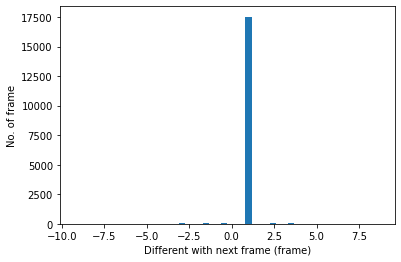

In [19]:
plt.hist(eegts['timediff'] * 128, bins=50)
plt.ylabel('No. of frame')
plt.xlabel('Different with next frame (frame)')

=> The signal is mostly consistent, but still some missed frames.

In [20]:
raw.get_data().shape

(32, 17920)

## Extract eye blink signals

3 steps:

    1. Find blinks in ET signals:
        Consecutive missed ET signal of at least 4 samples is considered a blink
    2. Find corresponding timestamps of blinks
    3. Find EEG samples corresponding to timestamps of blinks

In [22]:
def get_blink(et_df: pd.DataFrame) -> list:
    # some temporary fixes
    et_df = et_df.rename(columns={'y': 'data', 'x': 'y', 'Data': 'x'})
    et_df['TimeStampNorm'] = et_df['TimeStamp'] - et_df['TimeStamp'][0]
    
    # get data corresponds to typing part
    typing_start = et_df[et_df['character typing'] == 'Typing'].tail(1).index.item()
    type_df = et_df[typing_start+1:]
    type_df = type_df[type_df['character typing'] != 'MainMenu']
    
    # get different of eye movement
    type_df['Xdiff'] = [*type_df['x'][1:], 0] - type_df['x']
    type_df['Ydiff'] = [*type_df['y'][1:], 0] - type_df['y']
    
    # blink corresponds to part where there are no eye movement
    blink_df = type_df[(type_df['Xdiff'] == 0) & (type_df['Ydiff'] ==0)]
    blink_df = blink_df.reset_index()
    
    start_blink = 0
    blinks = []
    for idx in range(1, len(blink_df)):
        if blink_df.loc[idx, 'index'] - blink_df.loc[idx-1, 'index'] > 1:
            # a missing of eye movement for at least 3 frames (50ms) and at most 31 frames (500ms) is considered a blink
            if idx - start_blink > 4 and idx - start_blink < 31:
                blinks.append((blink_df.loc[start_blink, 'TimeStamp'], blink_df.loc[idx-1, 'TimeStamp']))
            start_blink = idx

    return blinks

In [24]:
def get_blink_annotations(blinks: list, eeg_ts) -> mne.Epochs:
    onset = []
    duration = []
    eeg_start_time = eeg_ts.loc[0].TimeStamp
    
    for blink in blinks:
        onset.append(eeg_ts[eeg_ts['TimeStamp'] >= blink[0]].head(1).TimeStamp.item() - eeg_start_time)
        duration.append(blink[1] - blink[0])
    
    annos = mne.Annotations(onset, duration, 'blink')
    return annos

In [25]:
import os

"""
Load raw EEG data and ET data
"""
def load_blink(subjects: list, samples: list = None) -> mne.io.BaseRaw:
    if (subjects == None or type(subjects) != list):
        raise(BaseException('Invalid parameter'))
        return None
        
    if samples is None:
        samples = [f'sample{i}' for i in range(1, 10)]
    filepaths = [f'DataVIN/{subject}/{sample}/' for sample in samples for subject in subjects]
    if any(map(lambda f: not os.path.exists(f), filepaths)):
        raise(BaseException(f'Folder not found. List folders: {filepaths}'))
    
    res = []
    epochs = []
    
    print(f'Loading data from: {filepaths}')
    
    for filepath in filepaths:
        et_df = pd.read_csv(filepath + 'ET.csv')
        eeg_ts = pd.read_csv(filepath + 'EEGTimeStamp.txt', names=['TimeStamp'])
        
        blinks = get_blink(et_df)
        annos = get_blink_annotations(blinks, eeg_ts)
        
        eeg_raw = mne.io.read_raw_edf(filepath + 'EEG.edf', verbose=0)
        eeg_raw.load_data().filter(2., 20.)
        eeg_raw.set_annotations(annos)
        
        events, event_id = mne.events_from_annotations(eeg_raw)
        epochs.append(mne.Epochs(raw=eeg_raw, baseline=None, tmin=-0, tmax=0.7, events=events, event_id=event_id, verbose=0))
    
    return mne.concatenate_epochs(epochs)


## View blinks in EEG

In [27]:
# 1 epoch is a segment of EEG signal corresponding to an event (blink)
# epochs = hmi_dataloader.load_eeg_blinks(['HMI02'], ['sample3', 'sample4', 'sample5', 'sample6'])
epochs = load_blink(['HMI02'], ['sample3', 'sample4', 'sample5', 'sample6'])
len(epochs)

Loading data from: ['DataVIN/HMI02/sample3/', 'DataVIN/HMI02/sample4/', 'DataVIN/HMI02/sample5/', 'DataVIN/HMI02/sample6/']


KeyError: 'character typing'

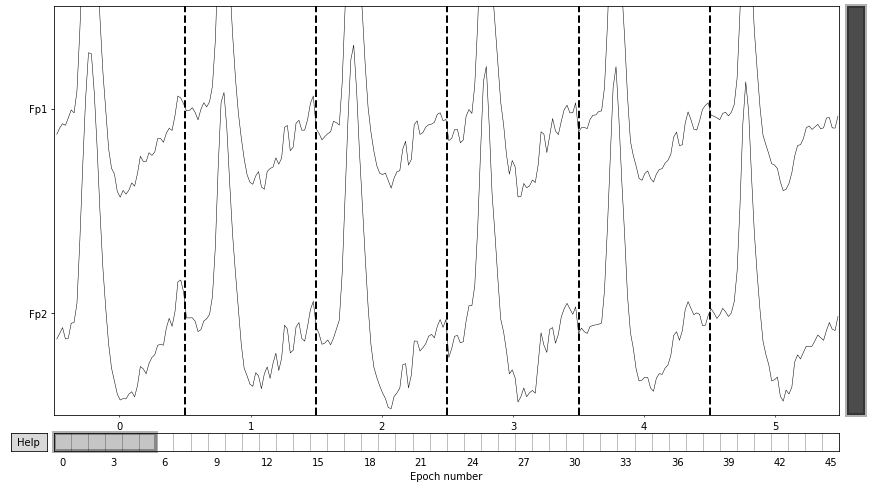

In [19]:
mne.viz.plot_epochs(epochs, picks=['Fp1', 'Fp2'], n_epochs=6, scalings=0.1, butterfly=False);

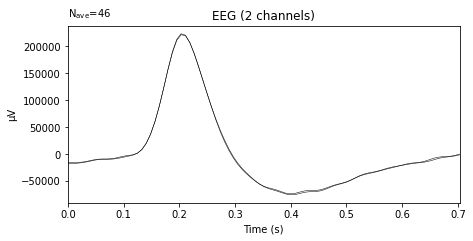

In [20]:
epochs.average().plot(picks = ['Fp1', 'Fp2']);

We can see that blinks have very high altitude, from -100.000 to 250.000, much higher than other brain activities.

## Automatically extract blinks from EEG

Some steps:

    1. Normalized epoched signals
    2. Using a sliding windows to check EEG signals
    3. Check 

In [21]:
"""
Input is a tensor of shape (number of signals, 2)
"""
def normalize(data):
    data = stats.zscore(data, axis=1)
    data = np.sum(data, axis=2)
    data = np.square(data)
    data = np.log(data)
    norm = np.linalg.norm(data, axis=1)
    
    for i in range(data.shape[0]):
        data[i] = data[i] / norm[i]
    return data

Loading data from: ['../data/BN002/sample1/', '../data/BN002/sample2/', '../data/BN002/sample3/']
Used Annotations descriptions: ['blink']
Used Annotations descriptions: ['blink']
Used Annotations descriptions: ['blink']


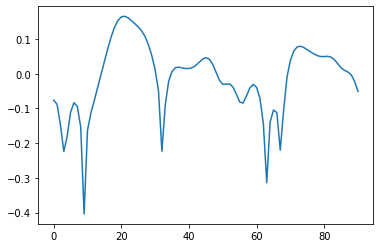

In [22]:
epochs = hmi_dataloader.load_eeg_blinks(['BN002'], ['sample1', 'sample2', 'sample3'])
df = epochs.pick(['Fp1', 'Fp2']).to_data_frame()
data = []
for i in range(df['epoch'].max() + 1):
    data.append(df[df['epoch'] == i][['Fp1', 'Fp2']])
data = np.asarray(data)
data = normalize(data)

plt.plot(data[0])

In [23]:
from scipy import stats

def get_blink_signature(subjects, samples):
    epochs = hmi_dataloader.load_eeg_blinks(subjects, samples)
    df = epochs.pick(['Fp1', 'Fp2']).to_data_frame()
    data = []
    for i in range(df['epoch'].max() + 1):
        data.append(df[df['epoch'] == i][['Fp1', 'Fp2']])
    data = np.asarray(data)
    data = normalize(data)
    
    mean_data = np.mean(data, axis=0)

    return mean_data / np.linalg.norm(mean_data), data

In [24]:
bl_sig, train_data = get_blink_signature(['BN002'], ['sample1', 'sample2', 'sample3'])
len(bl_sig)

Loading data from: ['../data/BN002/sample1/', '../data/BN002/sample2/', '../data/BN002/sample3/']
Used Annotations descriptions: ['blink']
Used Annotations descriptions: ['blink']
Used Annotations descriptions: ['blink']


91

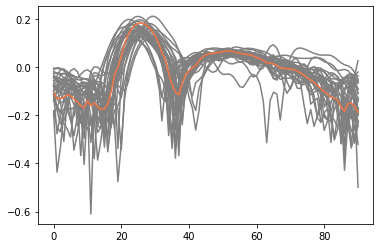

In [25]:
for i in range(train_data.shape[0]):
    plt.plot(train_data[i], color = 'gray')
plt.plot(bl_sig, color = '#f57542')

## Detect blinks in EEG using blink signature

The blink signature is 0.7 second long (0. before + 0.7 after).
For a sliding window of 0.7 second:

- normalize the signal
- Calculate a similarity with blink signature using cosine similarity

In [26]:
# let check with other blink events first
epochs = hmi_dataloader.load_eeg_blinks(['BN002'], ['sample4', 'sample5', 'sample6'])
df = epochs.pick(['Fp1', 'Fp2']).to_data_frame()
data = []
for i in range(df['epoch'].max() + 1):
    data.append(df[df['epoch'] == i][['Fp1', 'Fp2']])
data = np.asarray(data)
data = normalize(data)

for i in range(data.shape[0]):
    print('Similarity with signature:', np.matmul(data[i], bl_sig))

Loading data from: ['../data/BN002/sample4/', '../data/BN002/sample5/', '../data/BN002/sample6/']
Used Annotations descriptions: ['blink']
Used Annotations descriptions: ['blink']
Used Annotations descriptions: ['blink']
Similarity with signature: 0.5914672327370397
Similarity with signature: 0.5626586144715089
Similarity with signature: 0.7031505411180757
Similarity with signature: 0.641022452202326
Similarity with signature: 0.7681675078845934
Similarity with signature: 0.5479251462171754
Similarity with signature: 0.8614109041903083
Similarity with signature: 0.8538083097796814
Similarity with signature: 0.8249281358039394
Similarity with signature: 0.8250977224590719
Similarity with signature: 0.7675469607467659
Similarity with signature: 0.7954124044356874
Similarity with signature: 0.8025469042741189
Similarity with signature: 0.7971067532377031
Similarity with signature: 0.9268613221455649
Similarity with signature: 0.8778426359822935
Similarity with signature: 0.914412457328903

It seems 0.55 could be a good threshold!

Let's test with raw eeg signal

In [27]:
def get_typing_signals(sample_path):
    raw_eeg = mne.io.read_raw_edf(SAMPLE_PATH + 'EEG.edf')
    raw_eeg.load_data().pick(['Fp1', 'Fp2']).filter(2., 20.)
    eeg_ts = pd.read_csv(SAMPLE_PATH + 'EEGTimeStamp.txt')
    
    # get typing annotation
    try:
        typing_annotation = next(filter(lambda a: a['description'] == 'Typing', raw_eeg.annotations))
    except StopIteration:
        print('Typing annotation not found for', sample_path)
    
    # to offset some misalignment in typing event in EEG and ET, we reduce the duration for 2 seconds, 1 at start, 1 at end
    eeg_start = typing_annotation['onset'] + 1
    eeg_end = eeg_start + typing_annotation['duration'] - 2
    timestamp_start = typing_annotation['onset'] + eeg_ts.loc[0].item() + 1
    timestamp_end = timestamp_start + typing_annotation['duration'] - 2
    print('Extracting EEG from', eeg_start, 'to',  eeg_end, 'duration', eeg_end - eeg_start)
    print('Extracting ET from', timestamp_start, 'to', timestamp_end, 'duration', timestamp_end - timestamp_start)
    
    # get EEG data
    typing_eeg = raw_eeg.crop(tmin=eeg_start, tmax=eeg_end)
    
    # get ET dataframe
    et_df = pd.read_csv(sample_path + 'ET.csv').rename(columns={'y': 'data', 'x': 'y', 'Data': 'x'})
    et_df['TimeStampNorm'] = et_df['TimeStamp'] - et_df['TimeStamp'][0]

    # get data corresponds to typing part
    start_index = et_df[et_df['TimeStamp'] >= timestamp_start].head(1).index.item()
    end_index = et_df[et_df['TimeStamp'] >= timestamp_end].head(1).index.item()
    type_df = et_df[start_index:end_index]
    
    return typing_eeg, type_df

In [28]:
def get_blink_eeg(eeg_raw, bl_sig, threshold):
    # eeg_raw returns data as (channels, timepoint), so we transpose it
    eeg_ndarray = eeg_raw.get_data().T
    window_len = len(bl_sig)

    blink_eeg = []
    for i in range(0, eeg_ndarray.shape[0]-window_len, 1):
        # the blink signature is 104
        window = eeg_ndarray[i:i+window_len]
        window = normalize(np.expand_dims(window, axis=0))

        sim = np.matmul(window, bl_sig)
        if sim > threshold:
            blink_eeg.append([i, sim])
        else:
            blink_eeg.append([i, 0])
    return np.asarray(blink_eeg)

In [29]:
# blink corresponds to part where there are no eye movement
def get_blink_et(et_df):
    blink_et = []
    start_blink = -1

    # should not change existing dataframe
    et_df = et_df.copy()
    
    # get different of eye movement
    et_df['Xdiff'] = [*et_df['x'][1:], 0] - et_df['x']
    et_df['Ydiff'] = [*et_df['y'][1:], 0] - et_df['y']
    et_df = et_df.reset_index()
    for i in range(len(et_df)):
        if et_df.loc[i, 'Xdiff'] == 0 and et_df.loc[i, 'Ydiff'] == 0:
            blink_et.append([i, 1])
        else:
            blink_et.append([i, 0])

    for i in range(len(blink_et)):
        if blink_et[i][1] == 1:
            blink_et[i][1] = blink_et[i-1][1] + 1

    cur = len(blink_et) - 1
    while cur > 0:
        if blink_et[cur][1] > 1:
            while blink_et[cur][1] > 0:
                blink_et[cur][1] = 1
                cur -= 1
        blink_et[cur][1] = 0
        cur -= 1
    return np.asarray(blink_et)

In [78]:
len_edf = []
len_ts = []
for i in range(1,10): 
    sample_path = f'../data/BN002/sample{i}/'
    eeg_raw = mne.io.read_raw_edf(sample_path + 'EEG.edf')
    eeg_ts = np.genfromtxt(sample_path + 'EEGTimeStamp.txt')
    len_edf.append(len(eeg_raw))
    len_ts.append(len(eeg_ts))
    
print('Length EDF', len_edf)
print('Length TS', len_ts)

Extracting EDF parameters from /home/peara/projects/hmi-bci-dataset/data/BN002/sample1/EEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/peara/projects/hmi-bci-dataset/data/BN002/sample2/EEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/peara/projects/hmi-bci-dataset/data/BN002/sample3/EEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/peara/projects/hmi-bci-dataset/data/BN002/sample4/EEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/peara/projects/hmi-bci-dataset/data/BN002/sample5/EEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/peara/projects/hmi-bci-dataset/data/BN002/sample6/EEG.edf.

In [79]:
len_edf = np.asarray(len_edf)
len_ts = np.asarray(len_ts)

len_edf - len_ts

array([ 0, 32, 96, 64, 32, 96,  0, 96, 32])

In [61]:
len(eeg_raw)

15232

In [86]:
# typing_eeg, typing_et = get_typing_signals(SAMPLE_PATH)
import importlib
importlib.reload(hmi_dataloader)

typing_eeg, typing_et = hmi_dataloader.get_typing_signals('BN002', 'sample9')

Extracting EDF parameters from /home/peara/projects/hmi-bci-dataset/data/BN002/sample9/EEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15231  =      0.000 ...   118.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 213 samples (1.664 sec)

Extracting EEG from 50.3257 to 112.4307 duration 62.105000000000004
Extracting ET from 108990.5136397 to 109052.6186397 duration 62.104999999995925


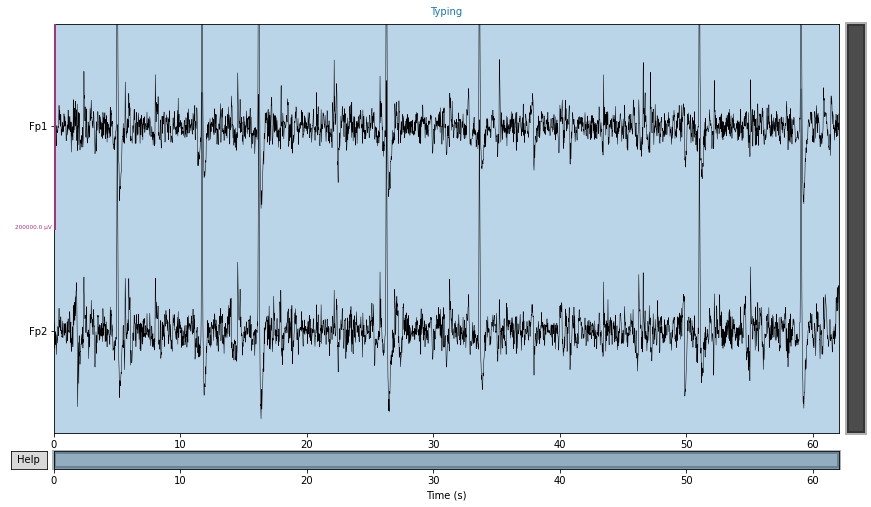

In [41]:
# typing_eeg = mne.io.read_raw_edf('../data/BN002/sample6/EEG.edf')
# typing_eeg.load_data().pick(['Fp1', 'Fp2']).filter(2., 20.)
typing_eeg.plot(scalings=0.1, duration=100);

### Detect blinks from EEG signal

In [42]:
THRESHOLD = 0.65
blink_eeg = get_blink_eeg(typing_eeg, bl_sig, THRESHOLD)

/home/peara/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


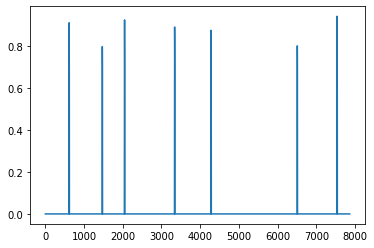

In [43]:
plt.plot(blink_eeg[:, 0], blink_eeg[:, 1])

### Detect blinks from ET signal

In [44]:
blink_et = get_blink_et(typing_et)
blink_et

array([[   0,    0],
       [   1,    0],
       [   2,    0],
       ...,
       [3724,    1],
       [3725,    1],
       [3726,    0]])

### Detect blinks from video

In [46]:
from hbd.utils.blink import detect_blink_video

blink_video = detect_blink_video('BN002', 'sample9')

### Plot blinks from EEG and ET

In [47]:
# because of differences in algorithms, the length of blink detection from ET and EEG do not match, so we strip some from the end of ET to make them match
et_eeg_dif = len(bl_sig) * 60 // 128
print(blink_eeg.shape[0]/128, (blink_et.shape[0] - et_eeg_dif)/60)

61.3984375 61.416666666666664


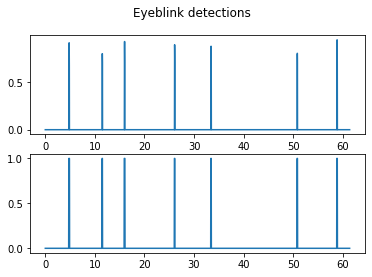

In [48]:
fig, axs = plt.subplots(2)
fig.suptitle('Eyeblink detections')
axs[0].plot(blink_eeg[:, 0] / 128, blink_eeg[:, 1])
axs[1].plot(blink_et[:-et_eeg_dif, 0] / 60, blink_et[:-et_eeg_dif, 1])
# axs[2].plot(blink_video[:, 0] / 30, blink_video[:, 1], '.')

In [80]:
import pprint
import math
"""
Matching element of 2 series of events X and Y so that the distance in times between them is minimized.

Some constrains:
- 2 elements can be matched if the differences in times is less than 1 second.
- 1 element can be matched with 0 or 1 element.
- distance between 2 series is calculated as total differences in second of matched elements plus 1 per unmatched elements.

Input:
- 2 series of timestamps of events
- Assume to start at 0
- Assume to end at last element

Output:
- list of tuple of matched ids (x, y) in ascending order
- minimum total distance
"""
def match_ts_eq_len(X, Y, threshold=1., offset=0):
#     assert abs(X[-1] - Y[-1] - offset) <= 1.
    matches = []
    dist = 0
    
    dp = [[1000 for i in range(len(Y)+1)] for j in range(len(X)+1)]
    for i in range(len(Y)+1):
        dp[len(X)][i] = len(Y) - i 
    for j in range(len(X)+1):
        dp[j][len(Y)] = len(X) - j

    for i in reversed(range(len(X))):
        for j in reversed(range(len(Y))):
            if abs(X[i] - Y[j] - offset) < threshold:
                dp[i][j] = min(dp[i][j], dp[i+1][j+1] + abs(X[i] - Y[j] - offset))
            dp[i][j] = min(dp[i][j], min(dp[i+1][j], dp[i][j+1]) + 1)
    
    cur = (0,0)
    while cur[0] < len(X) and cur[1] < len(Y):
        i = cur[0]
        j = cur[1]
        if abs(X[i] - Y[j] - offset) < threshold and math.isclose(dp[i][j], dp[i+1][j+1] + abs(X[i] - Y[j] - offset)):
            matches.append(cur)
            cur = (i+1, j+1)
        elif dp[i][j] == dp[i+1][j] + 1:
            cur = (i+1, j)
        elif dp[i][j] == dp[i][j+1] + 1:
            cur = (i, j+1)
        else:
            raise('WRONG!')
    
    return matches, dp[0][0]

In [81]:
import bisect
"""
Matching element of 2 series of events X and Y so that the distance in times between them is minimized.
2 series can differ in length. 
When there is a different in length, X must be the shorter one.

Steps:
- Try every posible first match estimated last match accordingly.
- Using match_ts_eq_len to calculate the best distance
"""
def match_ts(X, Y, threshold=1.):
    matches, dist = [], 1000
    best_offset = -1
    
    # if there is differences in length
    if abs(X[-1] - Y[-1]) > 1:
        for offset in range(abs(int(X[-1] - Y[-1])) + 1):
            if X[-1] > Y[-1]:
                raise Exception('First series should be shorter than second series')
            st = bisect.bisect_left(Y, offset)
            fn = bisect.bisect_right(Y, X[-1] + offset)
            tm, td = match_ts_eq_len(X, Y[st:fn], threshold, -offset)
            if td < dist:
                matches = tm
                dist = td
                best_offset = offset
        
        st = bisect.bisect_left(Y, best_offset)
        matches = [(el[0], el[1] + st) for el in matches]
        
        diff = []
        for match in matches:
            diff.append(X[match[0]] - Y[match[1]] + best_offset)

        diff = np.asarray(diff)
        print('DIFF', diff)
        print('OFFSET', best_offset)
        
        # in the case the true offset is not a whole number (most of the time), the mean differences will reflect the differences between true offset and the found offset
        return matches, dist, best_offset - np.mean(diff)
    else:
        return *match_ts_eq_len(X, Y, threshold), 0

In [51]:
# combine consecutive matches into 1 blink event
blink_eeg_m = []

cur = 0
while cur < len(blink_eeg):
    if blink_eeg[cur][1] > 0:
        blink_eeg_m.append(blink_eeg[cur][0] / 128)
        while blink_eeg[cur][1] > 0:
            cur += 1
    else:
        cur += 1
blink_eeg_m = np.asarray(blink_eeg_m)
blink_eeg_m

array([ 4.78125 , 11.484375, 15.953125, 26.0625  , 33.40625 , 50.8125  ,
       58.828125])

In [52]:
# combine consecutive matches into 1 blink event
blink_et_m = []

cur = 0
while cur < len(blink_et):
    if blink_et[cur][1] > 0:
        blink_et_m.append(blink_et[cur][0] / 60)
        while blink_et[cur][1] > 0:
            cur += 1
    else:
        cur += 1
        
blink_et_m = np.asarray(blink_et_m)
blink_et_m

array([ 4.73333333, 11.45      , 15.91666667, 26.03333333, 33.38333333,
       50.78333333, 58.8       , 61.9       , 62.06666667])

## Matching EEG and Video

In [53]:
blink_video_m = np.asarray(list(blink_video))

In [76]:
matches_eeg_video, dist_eeg_video, offset_eeg_video = match_ts(blink_eeg_m, blink_video_m)

DIFF [0.08645833 0.028125  ]
OFFSET 50


In [77]:
offset_eeg_video, matches_eeg_video

(49.94270833333333, [(2, 34), (6, 35)])

In [60]:
unmatched = len(blink_eeg_m) + len(blink_video_m) - 2 * len(matches_eeg_video)
print(f'Number of unmatches: {unmatched}')

Number of unmatches: 41


In [78]:
diff = []
for match in matches_eeg_video:
    diff.append(blink_eeg_m[match[0]] - blink_video_m[match[1]] + offset_eeg_video)
    
diff = np.asarray(diff)

In [79]:
print(diff)
diff.mean()

[ 0.02916667 -0.02916667]


0.0

## Matching EEG and ET

In [63]:
matches_eeg_et, dist_eeg_et, offset_eeg_et = match_ts(blink_eeg_m, blink_et_m)

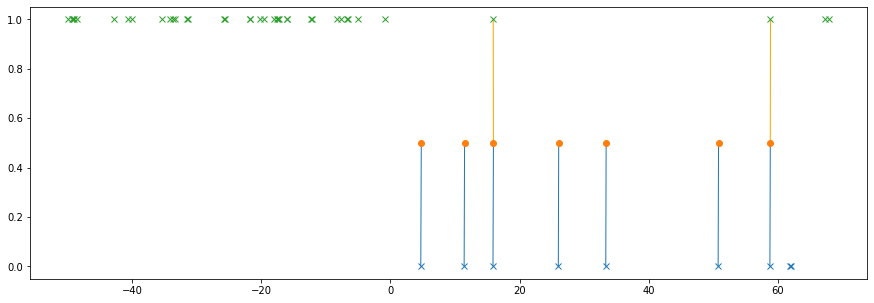

In [80]:
from matplotlib import collections  as mc

lines_eeg_video = [[(blink_eeg_m[match[0]], 0.5), (blink_video_m[match[1]] - offset_eeg_video, 1)] for match in matches_eeg_video]
lines_eeg_et = [[(blink_eeg_m[match[0]], 0.5), (blink_et_m[match[1]] - offset_eeg_et, 0)] for match in matches_eeg_et]

lc1 = mc.LineCollection(lines_eeg_video, linewidths=1, colors='orange')
lc2 = mc.LineCollection(lines_eeg_et, linewidths=1)
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

ax.plot(blink_et_m - offset_eeg_et, [0] * len(blink_et_m), 'x')
ax.plot(blink_eeg_m, [0.5] * len(blink_eeg_m), 'o')
ax.plot(blink_video_m - offset_eeg_video, [1] * len(blink_video_m), 'x')
ax.add_collection(lc1)
ax.add_collection(lc2)

In [82]:
from hbd.utils.blink import detect_blink_video
from hbd.utils import dataloader as hmi_dataloader
from matplotlib import collections  as mc

def match_blink_all(subject, sample, bl_sig):
    typing_eeg, typing_et = hmi_dataloader.get_typing_signals(subject, sample)

    # EEG signal
    THRESHOLD = 0.65
    blink_eeg = get_blink_eeg(typing_eeg, bl_sig, THRESHOLD)
    blink_eeg_m = []

    cur = 0
    while cur < len(blink_eeg):
        if blink_eeg[cur][1] > 0:
            blink_eeg_m.append(blink_eeg[cur][0] / 128)
            while blink_eeg[cur][1] > 0:
                cur += 1
        else:
            cur += 1
    blink_eeg_m = np.asarray(blink_eeg_m)
    
    # ET signal
    blink_et = get_blink_et(typing_et)
    blink_et_m = []

    cur = 0
    while cur < len(blink_et):
        if blink_et[cur][1] > 0:
            blink_et_m.append(blink_et[cur][0] / 60)
            while blink_et[cur][1] > 0:
                cur += 1
        else:
            cur += 1
    blink_et_m = np.asarray(blink_et_m)

    # video
    blink_video = detect_blink_video(subject, sample)
    blink_video_m = np.asarray(list(blink_video))
    
    # matching
    matches_eeg_video, dist_eeg_video, offset_eeg_video = match_ts(blink_eeg_m, blink_video_m)
    matches_eeg_et, dist_eeg_et, offset_eeg_et = match_ts(blink_eeg_m, blink_et_m)
    
    # plot
    lines_eeg_video = [[(blink_eeg_m[match[0]], 0.5), (blink_video_m[match[1]] - offset_eeg_video, 1)] for match in matches_eeg_video]
    lines_eeg_et = [[(blink_eeg_m[match[0]], 0.5), (blink_et_m[match[1]] - offset_eeg_et, 0)] for match in matches_eeg_et]

    lc1 = mc.LineCollection(lines_eeg_video, linewidths=1, colors='orange')
    lc2 = mc.LineCollection(lines_eeg_et, linewidths=1)
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 5)

    ax.plot(blink_et_m - offset_eeg_et, [0] * len(blink_et_m), 'x')
    ax.plot(blink_eeg_m, [0.5] * len(blink_eeg_m), 'o')
    ax.plot(blink_video_m - offset_eeg_video, [1] * len(blink_video_m), 'x')
    ax.add_collection(lc1)
    ax.add_collection(lc2)

Extracting EDF parameters from /home/peara/projects/hmi-bci-dataset/data/BN002/sample8/EEG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20607  =      0.000 ...   160.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 213 samples (1.664 sec)

Extracting EEG from 59.1062 to 152.9197 duration 93.8135
Extracting ET from 108820.2641439 to 108914.0776439 duration 93.81350000000384


/home/peara/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


DIFF [0.35416667 0.39010417 0.40833333 0.29010417 0.25572917 0.3671875
 0.40677083 0.3546875  0.30572917 0.278125  ]
OFFSET 59


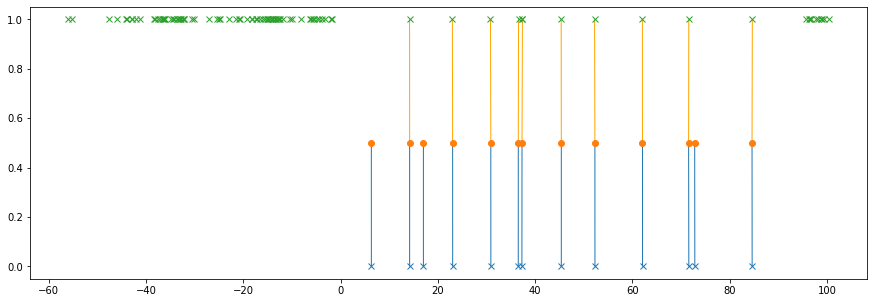

In [92]:
match_blink_all('BN002', 'sample8', bl_sig)